In [ ]:
Let's get started working with *pandas*!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [2]:
import pandas as pd

Series

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). 
The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.


In [3]:
ser = pd.Series([25,36,17,45,33], ['Person1', 'Person2', 'Person3', 'Person4', 'Person5'])

In [4]:
ser

Person1    25
Person2    36
Person3    17
Person4    45
Person5    33
dtype: int64

In [5]:
ser.index

Index(['Person1', 'Person2', 'Person3', 'Person4', 'Person5'], dtype='object')

In [6]:
ser.loc[['Person2','Person4']] #To check value at particular Index

Person2    36
Person4    45
dtype: int64

In [7]:
ser.iloc[2] # loc gets rows (or columns) with particular labels from the index. 
            #iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

17

In [8]:
'Person2' in ser #Return Boolean

True

In [9]:
ser

Person1    25
Person2    36
Person3    17
Person4    45
Person5    33
dtype: int64

In [10]:
ser * 4 #Multiplying by 4

Person1    100
Person2    144
Person3     68
Person4    180
Person5    132
dtype: int64

In [11]:
ser[['Person1', 'Person2']] ** 2 #Squaring the values

Person1     625
Person2    1296
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
diction = {'Age' : pd.Series([25,36,17,45,33], index=['Person1', 'Person2', 'Person3', 'Person4', 'Person5']),
     'Salary' : pd.Series([15000,20000,18000,14000,16000], index=['Person1', 'Person2', 'Person3', 'Person4', 'Person5'])}

In [13]:
df = pd.DataFrame(diction)
print(df)

         Age  Salary
Person1   25   15000
Person2   36   20000
Person3   17   18000
Person4   45   14000
Person5   33   16000


In [14]:
df.index

Index(['Person1', 'Person2', 'Person3', 'Person4', 'Person5'], dtype='object')

In [15]:
df.columns

Index(['Age', 'Salary'], dtype='object')

In [16]:
pd.DataFrame(diction, index=['Person1', 'Person2', 'Person3'])

,Age,Salary
Person1,25,15000
Person2,36,20000
Person3,17,18000


In [17]:
pd.DataFrame(diction, index=['Person1', 'Person2', 'Person3'], columns=['Age', 'Salary']) #Separate columns and Index

,Age,Salary
Person1,25,15000
Person2,36,20000
Person3,17,18000


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'Person1': 1, 'Person2': 2}, {'Person3': 5, 'Person4': 10, 'Person5': 20}]

In [19]:
pd.DataFrame(data)

,Person1,Person2,Person3,Person4,Person5
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [20]:
pd.DataFrame(data, index=['Department1', 'Department2'])

,Person1,Person2,Person3,Person4,Person5
Department1,1.0,2.0,NaN,NaN,NaN
Department2,NaN,NaN,5.0,10.0,20.0


In [21]:
pd.DataFrame(data, columns=['Person1', 'Person2','Person3'])

,Person1,Person2,Person3
0,1.0,2.0,NaN
1,NaN,NaN,5.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df #Show the dataframe

,Age,Salary
Person1,25,15000
Person2,36,20000
Person3,17,18000
Person4,45,14000
Person5,33,16000


In [23]:
df['Age'] #Access only Age column

Person1    25
Person2    36
Person3    17
Person4    45
Person5    33
Name: Age, dtype: int64

In [24]:
df['HigherSalary'] = df['Salary'] > 14000 #Creating another column for HigherSalary
df

,Age,Salary,HigherSalary
Person1,25,15000,True
Person2,36,20000,True
Person3,17,18000,True
Person4,45,14000,False
Person5,33,16000,True


In [25]:
Age = df.pop('Age') #Remove collumn

In [26]:
df

,Salary,HigherSalary
Person1,15000,True
Person2,20000,True
Person3,18000,True
Person4,14000,False
Person5,16000,True


In [27]:
Age

Person1    25
Person2    36
Person3    17
Person4    45
Person5    33
Name: Age, dtype: int64

In [28]:
del df['HigherSalary'] #Delete column from data frame

In [29]:
df

,Salary
Person1,15000
Person2,20000
Person3,18000
Person4,14000
Person5,16000


Difference Between remove, del and pop

In [30]:
#remove removes the first matching value, not a specific index
a = [0, 2, 3, 2,5,6,3]
a.remove(3)
a

[0, 2, 2, 5, 6, 3]

In [31]:
#del removes the item at a specific index:
a = [3, 2, 12, 10,5]
del a[1]
a

[3, 12, 10, 5]

In [32]:
#pop removes the item at a specific index and returns it.
a = [8,6,4, 3, 5]

a.pop(1)

6

In [33]:
df.insert(0, 'copy_of_Salary', df['Salary']) #make copy of salary column and insert at location 0
df

,copy_of_Salary,Salary
Person1,15000,15000
Person2,20000,20000
Person3,18000,18000
Person4,14000,14000
Person5,16000,16000


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>

## Download the Dataset

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>


In [34]:
movies = pd.read_csv('C:/Deepak/IIM/Dataset/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [35]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('C:/Deepak/IIM/Dataset/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [36]:
ratings = pd.read_csv('C:/Deepak/IIM/Dataset/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [38]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [39]:
print(row_0)

userId         2
movieId    60756
tag        funny
Name: 0, dtype: object


In [40]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [41]:
row_0['userId']

2

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [43]:
tags.head() #Top 5 rows

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [44]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [45]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [47]:
# Extract row 3, 100, 200 from DataFrame

tags.iloc[ [0,100,200] ]

,userId,movieId,tag
0,2,60756,funny
100,62,6541,superhero
200,62,60074,bad script


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [48]:
ratings['rating'].describe() #Only Rating wil be reflected

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [49]:
ratings.describe() #Whole dataset will be described

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [50]:
ratings['rating'].mean()

3.501556983616962

In [51]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [52]:
ratings['rating'].min()

0.5

In [53]:
ratings['rating'].max()

5.0

In [54]:
ratings['rating'].std()

1.0425292390605359

In [55]:
ratings['rating'].mode() # 4.0 has maximum frequency

0    4.0
dtype: float64

In [56]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [59]:
filter_1 = ratings['rating'] > 4
print(filter_1)


0         False
1         False
2         False
3          True
4          True
5         False
6          True
7         False
8          True
9          True
10         True
11         True
12        False
13         True
14        False
15         True
16        False
17        False
18         True
19        False
20        False
21         True
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
100806    False
100807    False
100808    False
100809    False
100810    False
100811     True
100812     True
100813    False
100814     True
100815    False
100816    False
100817    False
100818    False
100819    False
100820    False
100821     True
100822    False
100823    False
100824    False
100825    False
100826    False
100827    False
100828    False
100829     True
100830    False
100831    False
100832     True
100833     True
100834     True
100835    False
Name: rating, Length: 10

In [60]:
filter_1.any() #It terminates at first change in value

True

In [73]:
filter_2 = ratings['rating'] > 0

filter_2

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
100806    True
100807    True
100808    True
100809    True
100810    True
100811    True
100812    True
100813    True
100814    True
100815    True
100816    True
100817    True
100818    True
100819    True
100820    True
100821    True
100822    True
100823    True
100824    True
100825    True
100826    True
100827    True
100828    True
100829    True
100830    True
100831    True
100832    True
100833    True
100834    True
100835    True
Name: rating, Length: 100836, dtype: bool

In [72]:
filter_2.all() #If all True return True if any cell value False.. return false

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [74]:
movies.shape

(9742, 3)

In [75]:
#is any row NULL ?

movies.isnull().any() #If any value true the any() function would terminate at first instance

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [76]:
ratings.shape

(100836, 3)

In [77]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [78]:
tags.shape

(3683, 3)

In [79]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

We have some tags which are NULL.

In [80]:
tags = tags.dropna()

In [81]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [82]:
tags.shape

(3683, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168262D8B38>]],
      dtype=object)

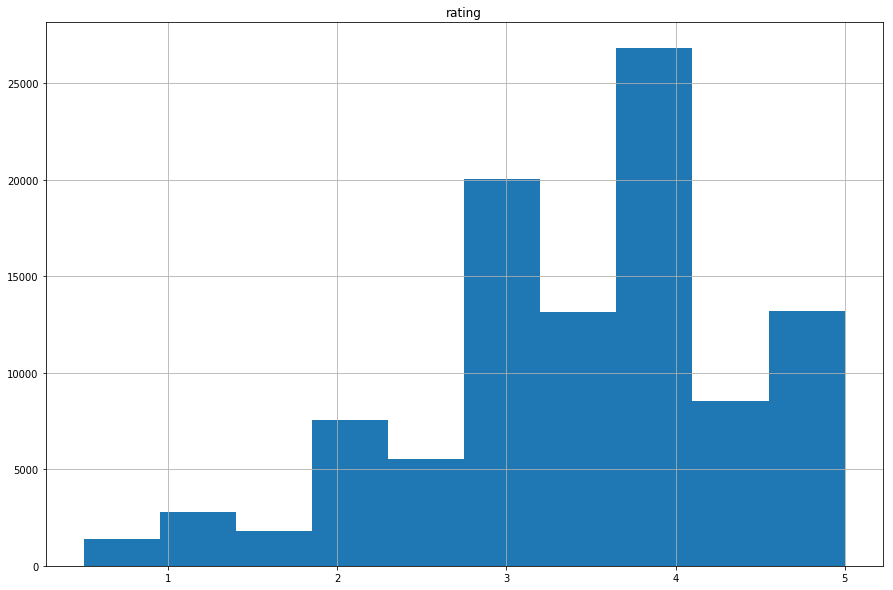

In [83]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

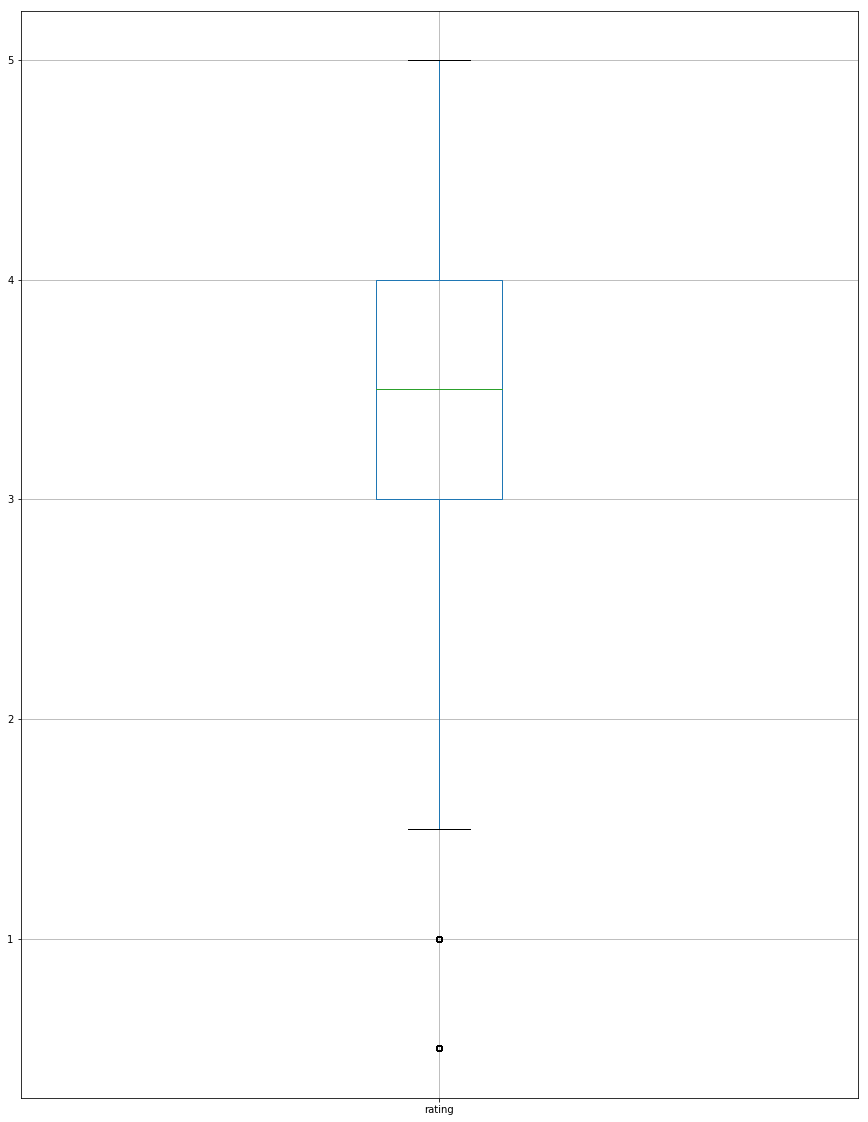

In [84]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [85]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [86]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [87]:
ratings[-10:] #last 10 rows

,userId,movieId,rating
100826,610,162350,3.5
100827,610,163937,3.5
100828,610,163981,3.5
100829,610,164179,5.0
100830,610,166528,4.0
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
100835,610,170875,3.0


In [88]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

Kurt Russell                           1
Oscar (Best Music - Original Score)    1
unpredictable                          1
families                               1
Kevin Spacey                           1
killer-as-protagonist                  1
cliche characters                      1
bad language                           1
cheeky                                 1
new society                            1
Name: tag, dtype: int64

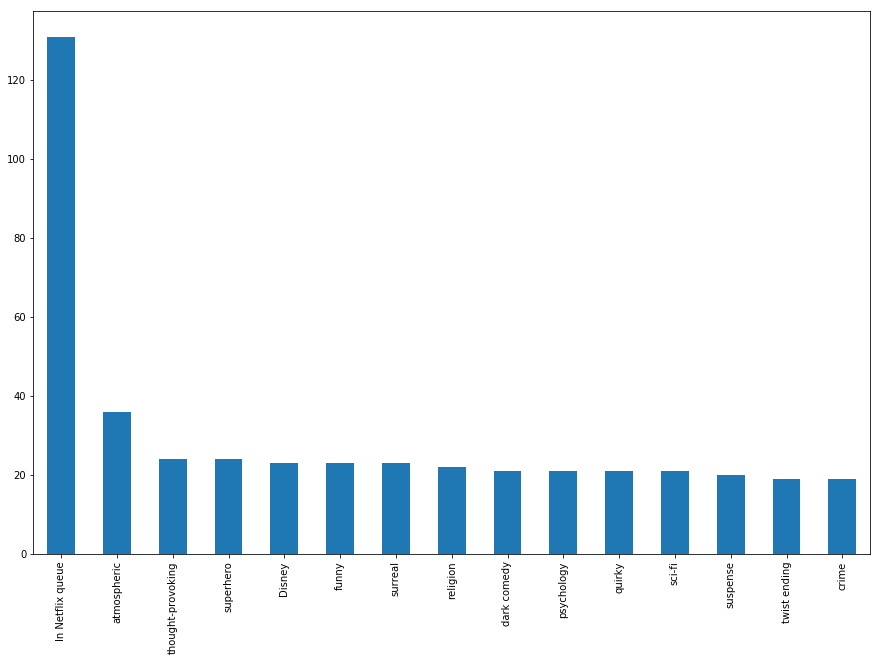

In [92]:
tag_counts[:15].plot(kind='bar', figsize=(15,10)) #bar chart for all columns

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [93]:
is_highly_rated = ratings['rating'] >= 4.0


In [94]:
ratings[is_highly_rated][30:50]

,userId,movieId,rating
36,1,608,5.0
38,1,661,5.0
40,1,733,4.0
43,1,804,4.0
44,1,919,5.0
45,1,923,5.0
46,1,940,5.0
47,1,943,4.0
48,1,954,5.0
50,1,1023,5.0


In [95]:
is_animation = movies['genres'].str.contains('Animation', 'Children') #Check either of Animation and Children

movies[is_animation][5:15]

,movieId,title,genres
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
522,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
527,616,"Aristocats, The (1970)",Animation|Children
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...


In [96]:
movies[is_animation].head(15) #Top 15 rows 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [97]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count() #Counting movies as per ratings
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [77]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean() #Average rating for each movie
average_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [98]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count() #Total rating each movie received
movie_count.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [99]:
movie_count.tail()

,rating
movieId,
193581,1
193583,1
193585,1
193587,1
193609,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [100]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [101]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [102]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game


In [105]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean() #Try True and see the difference
avg_ratings

,movieId,userId,rating
0,1,306.530233,3.920930
1,2,329.554545,3.431818
2,3,283.596154,3.259615
3,4,219.857143,2.357143
4,5,299.571429,3.071429
5,6,309.647059,3.946078
6,7,279.000000,3.185185
7,8,258.250000,2.875000
8,9,362.937500,3.125000
9,10,315.159091,3.496212


In [106]:
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [107]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9721,193585,Flint (2017),Drama,3.5
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [109]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [110]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
6,7,Sabrina (1995),Comedy|Romance,3.185185


In [111]:
box_office[is_comedy & is_highly_rated][-5:] #Pay attention to the structure of the dataframe

,movieId,title,genres,rating
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.0
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">String Operations</h1>


In [113]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [116]:
movie_genres = movies['genres'].str.split('|', expand=False)

In [117]:
movie_genres[:10]

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: genres, dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [118]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy') #Extracting all comedy movies

In [119]:
movie_genres[:10]

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: genres, dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [120]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True) #Regular Expression for Year

In [121]:
movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [122]:
tags = pd.read_csv('C:/Deepak/IIM/Dataset/tags.csv', sep=',')

In [123]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [124]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [125]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [126]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56


In [127]:
greater_than_2015_02_01 = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_2015_02_01]

tags.shape, selected_rows.shape

((3683, 5), (1710, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [128]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
1756,474,3181,Shakespeare,1137179352,2006-01-13 19:09:12
2212,474,6912,Rita Hayworth can dance!,1137179371,2006-01-13 19:09:31
1636,474,2494,Hungary,1137179426,2006-01-13 19:10:26
1635,474,2494,Holocaust,1137179426,2006-01-13 19:10:26
1497,474,1836,No DVD at Netflix,1137179444,2006-01-13 19:10:44
1961,474,4969,In Netflix queue,1137179563,2006-01-13 19:12:43
2409,474,26242,In Netflix queue,1137179570,2006-01-13 19:12:50
2413,474,27741,In Netflix queue,1137179587,2006-01-13 19:13:07
2231,474,7025,In Netflix queue,1137179593,2006-01-13 19:13:13
2485,474,41997,In Netflix queue,1137179603,2006-01-13 19:13:23


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [129]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5
9723,193609,4.0


In [131]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()


,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


In [133]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
5,1917,4.500000
6,1919,2.000000
7,1920,3.678571
8,1921,4.100000
9,1922,3.531250


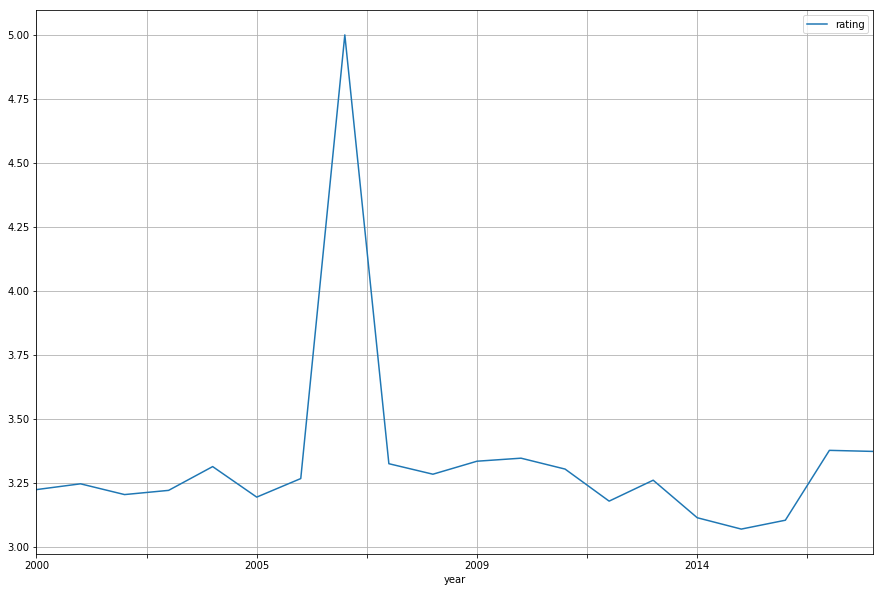

In [134]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)